In [92]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from PIL import Image
import sys
im = Image.open("/content/drive/My Drive/dataset/training_set/dogs/dog.2.jpg")
imResize = im.resize((200,200), Image.ANTIALIAS)
imResize.save('resized.jpg', 'JPEG', quality=100)

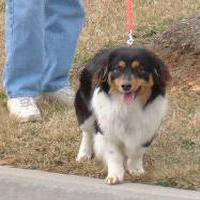

In [140]:
Image.open("/content/resized.jpg")

In [0]:
import os
import keras
from keras.layers import Conv2D , MaxPooling2D, Dense, Dropout, BatchNormalization,Activation,Flatten 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import shutil
from PIL import Image

In [0]:
# creating a dir for storing resized images
os.makedirs("/content/images/train")

In [0]:
# for dog_train data
path = "/content/drive/My Drive/dataset/training_set/dogs/"
path1 = "/content/images/train/"

for i,img in enumerate(os.listdir(path)):
  im = Image.open(path+img)
  imResize = im.resize((200,200), Image.ANTIALIAS)
  name = f"dog{i+1}.jpg"
  imResize.save(path1+name, 'JPEG', quality=100)
  
# for cat_train data
path = "/content/drive/My Drive/dataset/training_set/cats/"
path1 = "/content/images/train/"

for i,img in enumerate(os.listdir(path)):
  im = Image.open(path+img)
  imResize = im.resize((200,200), Image.ANTIALIAS)
  name = f"cat{i+1}.jpg"
  imResize.save(path1+name, 'JPEG', quality=100)  
  

In [0]:
# len(os.listdir("/content/images/test"))
# shutil.rmtree("/content/images/")
# os.listdir("/content/images")


In [0]:
# creating a dir for storing resized images
os.mkdir("/content/images/test")

In [0]:
# for dog_test data
path = "/content/drive/My Drive/dataset/test_set/dogs/"
path1 = "/content/images/test/"

for i,img in enumerate(os.listdir(path)):
  im = Image.open(path+img)
  imResize = im.resize((200,200), Image.ANTIALIAS)
  name = f"dog{i+1}.jpg"
  imResize.save(path1+name, "JPEG", quality=100)
  
# for cat_test data
path = "/content/drive/My Drive/dataset/test_set/cats/"
path1 = "/content/images/test/"

for i,img in enumerate(os.listdir(path)):
  im = Image.open(path+img)
  imResize = im.resize((200,200), Image.ANTIALIAS)
  name = f"cat{i+1}.jpg"
  imResize.save(path1+name, "JPEG", quality=100)
  



X_train shape is :  (1000, 200, 200, 3)


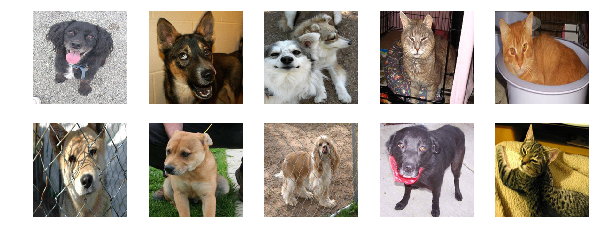

In [222]:
# Changing the Image into array
path = "/content/images/train/"
li = []

for i in tqdm(os.listdir(path)):
  li.append(img_to_array(load_img(path+i)))
  
X_train = np.array(li)

print("X_train shape is : ",X_train.shape)
# plotting some images

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i].astype('uint8'), cmap="Accent")
  plt.axis("off")
plt.show()

In [224]:
# Changing the test data into array
path = "/content/images/test/"

li_test = []

for name in os.listdir(path):
  li_test.append(img_to_array(load_img(path+name)))
  
X_test = np.array(li_test)
print("X_test shape is : ", X_test.shape)

X_test shape is :  (200, 200, 200, 3)


In [0]:
# Naormalization of train n test data\

X_train = X_train/255
X_test = X_test/255

# Training a small convnet from scratch:

In [0]:
# Define model

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(200,200,3), activation="relu", kernel_initializer="he_uniform"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer="he_uniform"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu", kernel_initializer="he_uniform"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



<h3>Let's prepare our data. We will use .flow_from_directory() to generate batches of image data (and their labels) directly from our jpgs in their respective folders.</h3>

In [249]:
# data augmentation

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rotation_range=90,
                            horizontal_flip=True,
                            vertical_flip=True,
                            width_shift_range = 0.5,
                            height_shift_range = 0.5,
                            zoom_range = 0.2,
                            shear_range=0.2,
                            zca_whitening=False,
                            fill_mode="nearest",
                            rescale = 1./255
                            ) 

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/dataset/training_set",
                                                   target_size= (200,200), # all images will be resized to 150x150
                                                   batch_size=128,
                                                   class_mode='binary', # since we use binary_crossentropy loss, we need binary labels
                                                   )

# this is similar for test data
test_generator = test_datagen.flow_from_directory("/content/drive/My Drive/dataset/test_set",
                                                 target_size=(200,200),
                                                 batch_size=128,
                                                 class_mode="binary")

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [250]:
# We can now use these generators to train our model

model.fit_generator(train_generator,
                   steps_per_epoch= 100,
                   epochs=5,
                   validation_data = test_generator,
                   #validation_steps= 50
                   )

# saving weights
model.save_weights("cats_vs_dogs.h5")

Epoch 1/5
100/100 [==============================] - 160s 2s/step - loss: 0.5486 - acc: 0.7193 - val_loss: 0.5929 - val_acc: 0.6850
Epoch 2/5
100/100 [==============================] - 166s 2s/step - loss: 0.5471 - acc: 0.7170 - val_loss: 0.5876 - val_acc: 0.7050
Epoch 3/5
100/100 [==============================] - 163s 2s/step - loss: 0.5514 - acc: 0.7151 - val_loss: 0.5923 - val_acc: 0.7100
Epoch 4/5
100/100 [==============================] - 166s 2s/step - loss: 0.5385 - acc: 0.7243 - val_loss: 0.6105 - val_acc: 0.6950
Epoch 5/5
100/100 [==============================] - 166s 2s/step - loss: 0.5283 - acc: 0.7331 - val_loss: 0.6076 - val_acc: 0.6650


# Using the bottleneck features of a pre-trained network

In [0]:
datagen = ImageDataGenerator(rescale=1./255)


# loading the vgg16 model
model = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")


""" For train data"""
# preparing images data
generator = datagen.flow_from_directory("/content/drive/My Drive/dataset/training_set",
                                       target_size=(200,200),
                                       batch_size=16,
                                       class_mode=None,
                                       shuffle=False)

# getting the bottleneck features after pass the data through model
bottleneck_feature_train = model.predict_generator(generator, 1000//16)

# saving bottleneck features
np.save(open('bottleneck_feature_train.npy', 'wb'),bottleneck_feature_train)



In [0]:
"""For test data"""
# preparing test image data
generator = datagen.flow_from_directory("/content/drive/My Drive/dataset/test_set",
                                       shuffle=False,
                                       target_size=(200,200),
                                       batch_size=16,
                                       class_mode=None)

# getting the bottleneck features for test data
bottleneck_feature_test = model.predict_generator(generator, 200//16)

# saving the bottleneck features
np.save(open("bottleneck_feature_test.npy", "wb"), bottleneck_feature_test)

In [9]:
# We have got out bottleneck features
# Time to train top model

# preparing train data
train_data = np.load(open("bottleneck_feature_train.npy", "rb"))

train_labels = np.array([0 if x < 496 else 1 for x in range(992)])

# preparing test data
test_data = np.load(open("bottleneck_feature_test.npy", "rb"))

test_labels = np.array([0 if x < 96 else 1 for x in range(192)])

# define top model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# compile model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

# Fit and train model
model.fit(train_data, train_labels, epochs=50, batch_size=128, validation_data=(test_data, test_labels))

# saving weights
model.save_weights("cats_vs_dogs_pretrained.h5")

Train on 992 samples, validate on 192 samples
Epoch 1/50
992/992 [==============================] - 1s 691us/step - loss: 1.6484 - acc: 0.6179 - val_loss: 0.6716 - val_acc: 0.6927
Epoch 2/50
992/992 [==============================] - 0s 193us/step - loss: 0.4837 - acc: 0.8095 - val_loss: 0.3762 - val_acc: 0.8490
Epoch 3/50
992/992 [==============================] - 0s 172us/step - loss: 0.2331 - acc: 0.9073 - val_loss: 0.3710 - val_acc: 0.8646
Epoch 4/50
992/992 [==============================] - 0s 156us/step - loss: 0.1901 - acc: 0.9304 - val_loss: 0.3632 - val_acc: 0.8698
Epoch 5/50
992/992 [==============================] - 0s 147us/step - loss: 0.1433 - acc: 0.9466 - val_loss: 0.3777 - val_acc: 0.8802
Epoch 6/50
992/992 [==============================] - 0s 145us/step - loss: 0.1121 - acc: 0.9647 - val_loss: 0.3817 - val_acc: 0.8646
Epoch 7/50
992/992 [==============================] - 0s 163us/step - loss: 0.0915 - acc: 0.9738 - val_loss: 0.3772 - val_acc: 0.8750
Epoch 8/50
992/9

# Fine-tuning the top layers of a pre-trained network

In [0]:
# load the model
model = keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(200,200,3))

# building a classifier model to put on top on VGG model
top_model = Sequential()
top_model.load_weights("/content/drive/My Drive/vgg16_weights.h5")
top_model.add(model)
top_model.add(Flatten(input_shape = model.output_shape[1:]))
top_model.add(Dense(256, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))


# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
# top_model.load_weights("/content/drive/My Drive/vgg16_weights.h5")


# add the model on top of the convolutional base/ VGG model
#model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)

for layer in model.layers[:25]:
  layer.trainable = False
# # compile the model with a SGD/momentum optimizer
# # and a very slow learning rate.
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9), metrics=["accuracy"])

# preparing data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2)

train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/dataset/training_set",
                                                   target_size=(200,200),
                                                   batch_size=16,
                                                   class_mode="binary")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory("/content/drive/My Drive/dataset/test_set",
                                                 target_size=(200,200),
                                                 batch_size=16,
                                                 class_mode="binary")

# fine tune model
model.fit_generator(train_generator, samples_per_epoch=1000, epochs=50, validation_data = test_generator)